In [1]:
import torch
import torchvision
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report
from torchvision import datasets, models, transforms

%run setup.ipynb

# Adding weight decay etc. to the training (after augs)

## Weight decay 0.0001 finetuning (model aug 1, unfreezing layer 4, 40 epochs)

In [2]:
model_finewd0001_aug1, model_finewd0001_aug1_info = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")

unfreeze_layer4(model_finewd0001_aug1)
epochs=40
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_finewd0001_aug1.parameters()), lr=0.001, weight_decay=0.0001)


In [3]:
model_finewd0001_aug1, model_finewd0001_aug1_info = train_model(model_finewd0001_aug1, optimizer, num_epoch=epochs, train=dataloader_train_aug1)


Epoch 1/40
----------
Train Loss: 0.2383 Acc: 0.9234
Val Loss: 0.1876 Acc: 0.9327
Epoch time 0m 41s
----------

Epoch 2/40
----------
Train Loss: 0.1222 Acc: 0.9629
Val Loss: 0.1637 Acc: 0.9712
Epoch time 0m 40s
----------

Epoch 3/40
----------
Train Loss: 0.1148 Acc: 0.9653
Val Loss: 0.0678 Acc: 0.9808
Epoch time 0m 42s
----------

Epoch 4/40
----------
Train Loss: 0.1027 Acc: 0.9701
Val Loss: 0.1426 Acc: 0.9615
Epoch time 0m 43s
----------

Epoch 5/40
----------
Train Loss: 0.0785 Acc: 0.9772
Val Loss: 0.0529 Acc: 0.9712
Epoch time 0m 43s
----------

Epoch 6/40
----------
Train Loss: 0.0794 Acc: 0.9760
Val Loss: 0.0435 Acc: 1.0000
Epoch time 0m 43s
----------

Epoch 7/40
----------
Train Loss: 0.0469 Acc: 0.9868
Val Loss: 0.0634 Acc: 0.9615
Epoch time 0m 44s
----------

Epoch 8/40
----------
Train Loss: 0.0571 Acc: 0.9832
Val Loss: 0.0863 Acc: 0.9615
Epoch time 0m 43s
----------

Epoch 9/40
----------
Train Loss: 0.0374 Acc: 0.9844
Val Loss: 0.0319 Acc: 1.0000
Epoch time 0m 45s
----

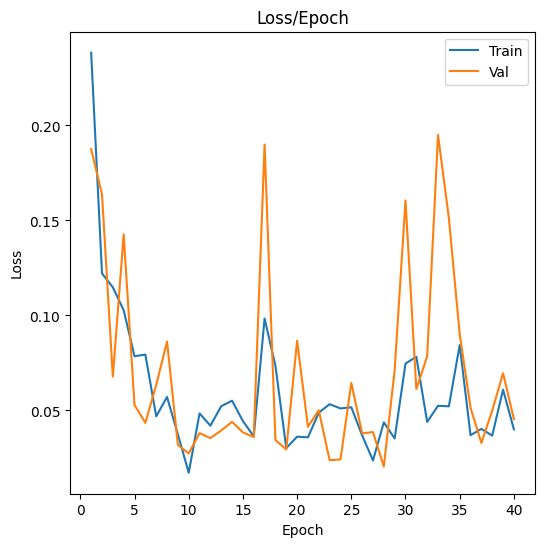

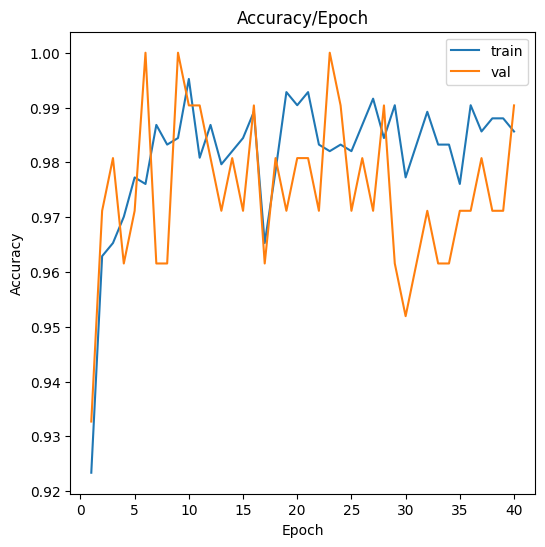

Lowest loss was 0.0205 at epoch 28
Highest accuracy was 1.0000 at epoch 6
Number of epochs run  40
Batch size was  16


In [4]:
plot_loss(model_finewd0001_aug1_info["train_loss"], model_finewd0001_aug1_info["val_loss"])
plot_accuracies(model_finewd0001_aug1_info["train_acc"], model_finewd0001_aug1_info["val_acc"], ["train", "val"])
print_stats(model_finewd0001_aug1_info)

In [5]:
truel, model_finewd0001_aug1_predl = labels_and_predictions(dataloader_test, model_finewd0001_aug1, device)
testacc_model_finewd0001_aug1 = (np.sum(model_finewd0001_aug1_predl==truel)/model_finewd0001_aug1_predl.size * 100)
print("Accuracy", testacc_model_finewd0001_aug1)
print(classification_report(truel, model_finewd0001_aug1_predl, target_names=class_labels))

Accuracy 98.09523809523809
              precision    recall  f1-score   support

     blueTit       1.00      0.93      0.97        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       1.00      0.93      0.97        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       0.88      1.00      0.94        15
       robin       1.00      1.00      1.00        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [6]:
truel_feed, model_finewd0001_aug1_predl_feed = labels_and_predictions(dataloader_feeder, model_finewd0001_aug1, device)
testaccfeed_model_finewd0001_aug1 = (np.sum(model_finewd0001_aug1_predl_feed==truel_feed)/model_finewd0001_aug1_predl_feed.size * 100)
print("Accuracy", testaccfeed_model_finewd0001_aug1)
print(classification_report(truel_feed, model_finewd0001_aug1_predl_feed, target_names=class_labels))

Accuracy 54.36700046422177
              precision    recall  f1-score   support

     blueTit       0.49      0.42      0.45      2078
   chaffinch       0.92      0.42      0.58      3552
     coalTit       0.78      0.47      0.58      1846
   goldfinch       0.88      0.75      0.81      2000
    greatTit       0.47      0.67      0.55      2033
       robin       0.19      0.14      0.17      1428
    starling       0.39      0.89      0.54      2142

    accuracy                           0.54     15079
   macro avg       0.59      0.54      0.53     15079
weighted avg       0.63      0.54      0.54     15079



In [9]:
_, before_i_did_all_this = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")
print_stats(before_i_did_all_this) # without the augs for finetuning
print(before_i_did_all_this.keys())

Lowest loss was 0.1816 at epoch 44
Highest accuracy was 0.9712 at epoch 36
dict_keys(['train_loss', 'val_loss', 'train_acc', 'val_acc'])


In [10]:
save_function("wdfine0001_aug1layer4_40.tar", model_finewd0001_aug1, model_finewd0001_aug1_info, extra_info={"test_acc": testacc_model_finewd0001_aug1, "feeder_acc": testaccfeed_model_finewd0001_aug1, "optimizer": "Adam with lambda and weight decay 0.0001", "note" : "weight decay on aug1layer4 finetuning"})